In [22]:
import numpy as np
from matplotlib import pyplot as plt

In [23]:
class Bandit(object):
    def __init__(self, numArms, trueRewards, epsilon, mode, Q, C): #<----
        self.Q = [Q for i in range(numArms)]
        self.N = [0 for i in range(numArms)]
        self.C = C
        self.numArms = numArms
        self.epsilon = epsilon
        self.trueRewards = trueRewards
        self.lastAction = None
        self.steps = 0
        self.mode = mode

    def pull(self):
        rand = np.random.random()
        if self.C == 0: # vanilla epsilon-greedy
            if rand <= self.epsilon:
                whichArm = np.random.choice(self.numArms)
            elif rand > self.epsilon:
                a = np.array([approx for approx in self.Q])
                whichArm = np.random.choice(np.where(a == a.max())[0])

        elif self.C > 0: # UCB
            a = np.zeros(self.numArms)
            for idx, approx in enumerate(self.Q):
                if self.N[idx] != 0:
                    a[idx] = approx + self.C * np.sqrt(np.log(self.steps)/self.N[idx])
                elif self.N[idx] == 0:
                    whichArm = idx
                    break
            else:
                whichArm = np.random.choice(np.where(a == a.max())[0])

        self.lastAction = whichArm
        self.steps += 1
        return np.random.randn() + self.trueRewards[whichArm]

    def updateMean(self,sample):
        whichArm = self.lastAction
        self.N[whichArm] += 1

        if self.mode == 'sample-average':
            self.Q[whichArm] = self.Q[whichArm] + 1.0/self.N[whichArm] * (sample - self.Q[whichArm])
        elif self.mode == 'constant':
            self.Q[whichArm] = self.Q[whichArm] + 0.1 * (sample - self.Q[whichArm])  # 0.1 is alpha


def simulate(numArms, epsilon, numPulls, mode, Q, C):
    rewardHistory = np.zeros(numPulls)
    for j in range(2000):
        rewards = [np.random.randn() for _ in range(numActions)]
        bandit = Bandit(numArms, rewards, epsilon, mode, Q, C)
        if j % 200 == 0:
            print(j)
        for i in range(numPulls):
            reward = bandit.pull()
            bandit.updateMean(reward)
            rewardHistory[i] += reward

    average = rewardHistory / 2000
    return average

# 1. 𝜖 = 0, 𝑄1(a) = 1, 5, 10

0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800


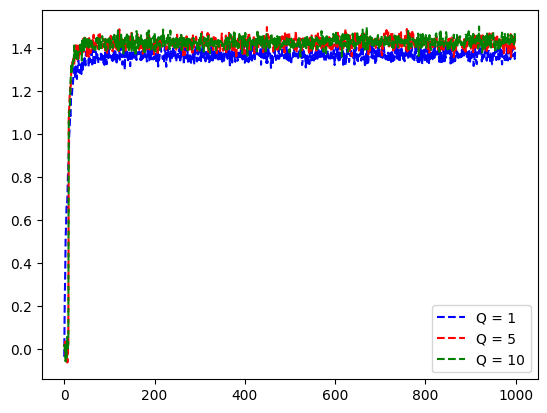

In [24]:
numActions = 10

run1 = simulate(numActions, epsilon=0, numPulls=1000, mode='sample-average', Q = 1, C = 0)
run2 = simulate(numActions, epsilon=0, numPulls=1000, mode='sample-average', Q = 5, C = 0)
run3 = simulate(numActions, epsilon=0, numPulls=1000, mode='sample-average', Q = 10, C = 0)

plt.plot(run1, 'b--', run2, 'r--', run3, 'g--')
plt.legend(['Q = 1', 'Q = 5', 'Q = 10'])
plt.show()


# 2. Same as above but 𝜖 = 0.1

0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120598 (\N{MATHEMATICAL ITALIC EPSILON SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


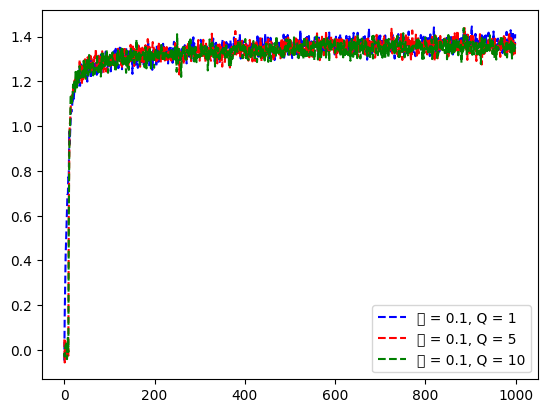

In [25]:
numActions = 10

run4 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='sample-average', Q = 1, C = 0)
run5 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='sample-average', Q = 5, C = 0)
run6 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='sample-average', Q = 10, C = 0)

plt.plot(run4, 'b--', run5, 'r--', run6, 'g--')
plt.legend(['𝜖 = 0.1, Q = 1', '𝜖 = 0.1, Q = 5', '𝜖 = 0.1, Q = 10'])
plt.show()

# 𝜖-greedy; 𝜖 = 0.1, 𝑄1 (𝑎) = 0
# Optimistisk med 𝑄1 (𝑎) = 10 och 𝜖 = 0.1
# UCB med 𝑄1 (𝑎) = 0 och c = 2 (UCB)
# Visa hur resultaten ändras när UCB har 𝜖 = 0.1

0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800
0
200
400
600
800
1000
1200
1400
1600
1800


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119876 (\N{MATHEMATICAL ITALIC CAPITAL Q}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119886 (\N{MATHEMATICAL ITALIC SMALL A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


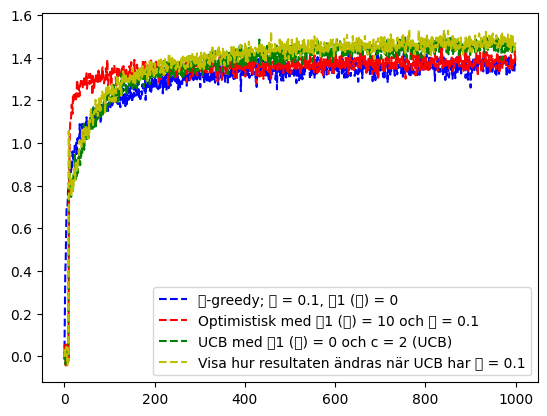

In [26]:
run7 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='sample-average', Q = 0, C = 0)
run8 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='sample-average', Q = 10, C = 0)
run9 = simulate(numActions, epsilon=0.0, numPulls=1000, mode='sample-average', Q = 0, C = 2)
run10 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='sample-average', Q = 0, C = 2)


plt.plot(run7, 'b--', run8, 'r--', run9, 'g--', run10, 'y--')
plt.legend(['𝜖-greedy; 𝜖 = 0.1, 𝑄1 (𝑎) = 0', 'Optimistisk med 𝑄1 (𝑎) = 10 och 𝜖 = 0.1', 'UCB med 𝑄1 (𝑎) = 0 och c = 2 (UCB)', 'Visa hur resultaten ändras när UCB har 𝜖 = 0.1'])
plt.show()